# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Цель:** провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов. 

**Описание данных:**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание столбцов в предоставленных данных:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Для достижения поставленной цели выполним следующие шаги:
1. Изучим общую информацию о данных
2. Проведем предобработку данных (изучим пропуски, удалим неявные дубликаты)
3. Добавим новые столбцы
4. Проведем исследовательский анализ (изучим аномалии и проверим взаимосвязь данных между собой)

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/FATHER/datasets/real_estate_data.csv', sep="\t")

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


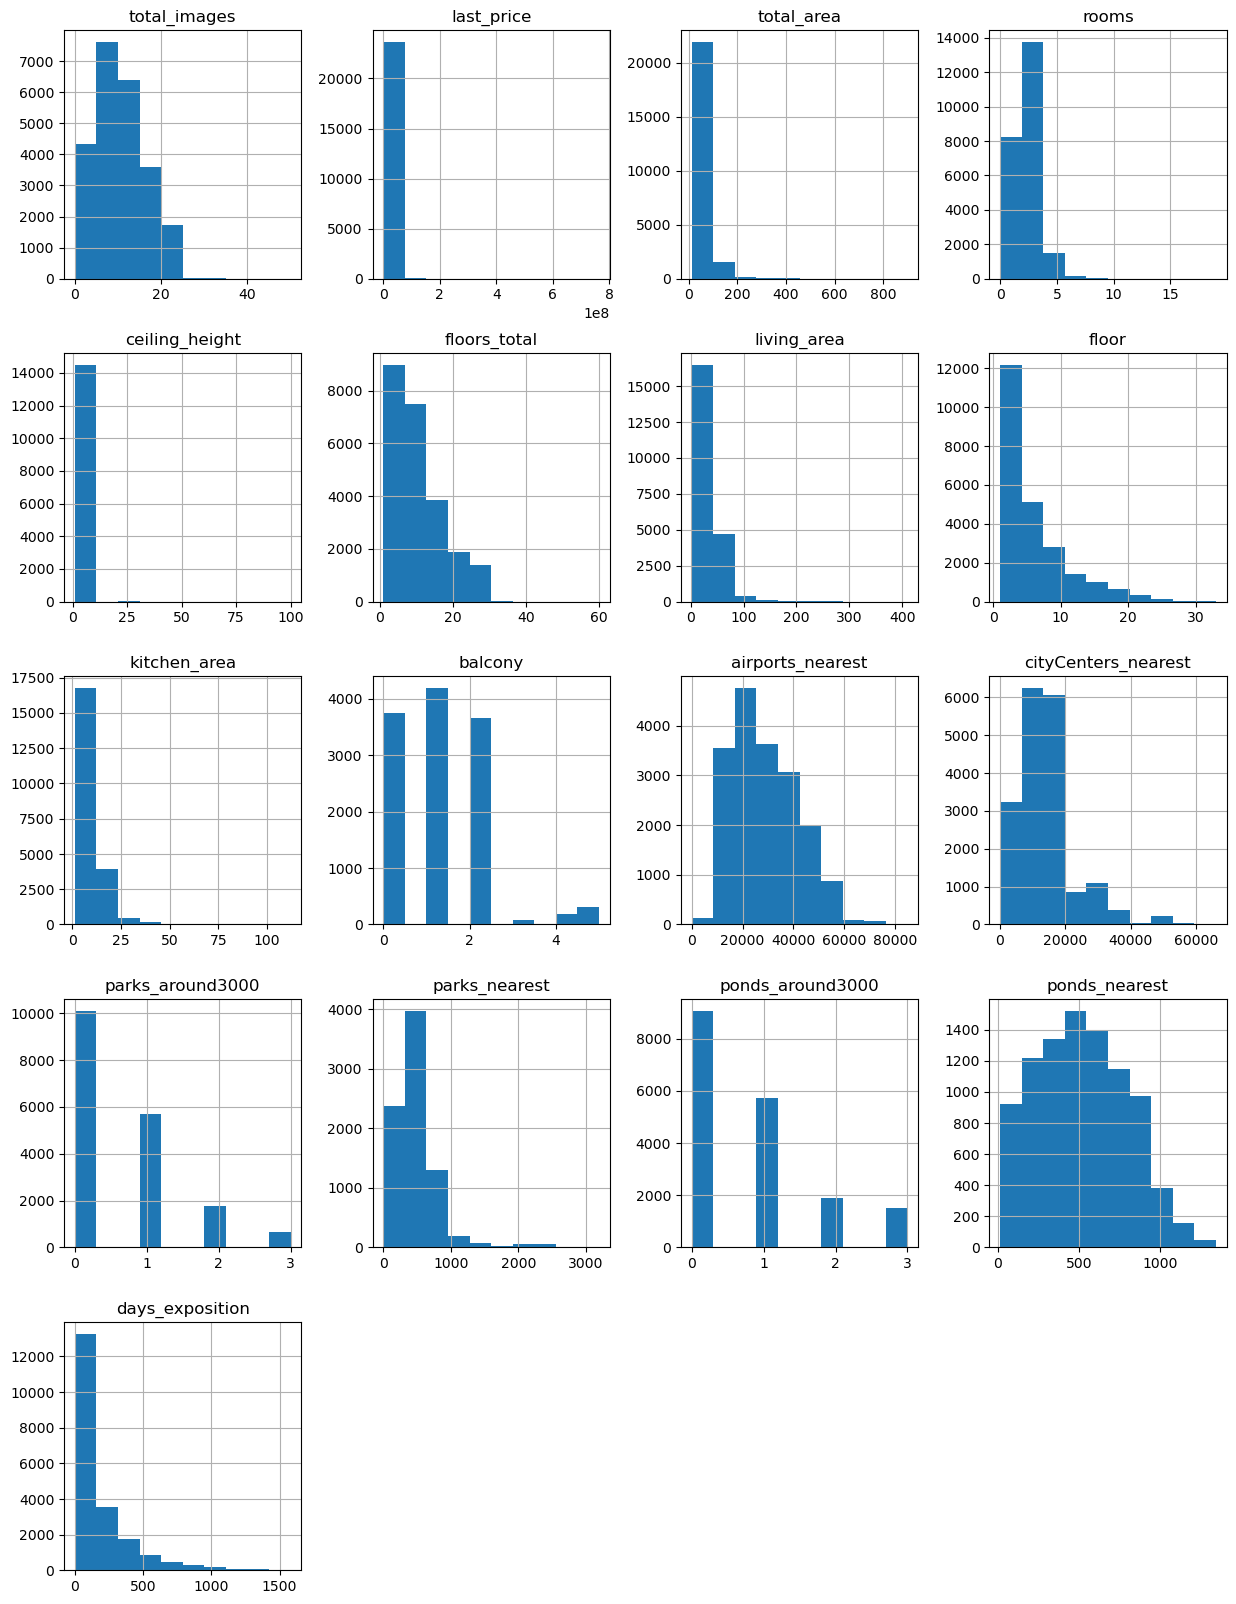

In [6]:
data.hist(figsize=(15,20));

**Вывод:**

В данных 22 колонки и 23 698 строчек.

По гистограммам сложно сделать выводы на данном этапе, рассмотрим их подробнее в дальнейшем.

### Предобработка данных

In [7]:
#Переименуем один столбец под общий вид
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

#### Удаление пропусков

In [8]:
#Пропущенное количество значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски в столбцах `is_apartment`, `parks_around3000`, `ponds_around3000`, `ponds_nearest` можно оставить, так как эти данные не понадобятся в нашем исследовании.

Для заполнения пропусков в столбцах `airports_nearest`, `parks_nearest`, `city_centers_nearest`, `days_exposition` у нас не хватает информации, поэтому тоже их оставим

Заполним пропуски в столбце `ceiling_height`. 

Сначала проверим зависит ли этот параметр от других данных.

In [9]:
list_cor=[]

for column in data.columns:
    try:
        list_cor.append( [data['ceiling_height'].corr(data[column])])
    except:
        list_cor.append([None])

cor = pd.DataFrame(data=list_cor,index=data.columns, columns=['correlation'])
cor.sort_values(by ='correlation', ascending=False)

,correlation
ceiling_height,1.000000
total_area,0.095490
living_area,0.090650
kitchen_area,0.087641
last_price,0.085430
ponds_around3000,0.078209
parks_around3000,0.065915
rooms,0.054457
open_plan,0.042777
balcony,0.040523


Можно заметить, что коэффициент корреляции везде близок к нулю, значит, заполним все пропуски одной медианой.

In [10]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data['ceiling_height'].median()

Заполним пропуски в столбце `living_area`. 

Посмотрим от каких значений зависит жилая площадь в квартире.

In [11]:
list_cor=[]

for column in data.columns:
    try:
        list_cor.append( [data['living_area'].corr(data[column])])
    except:
        list_cor.append([None])

cor = pd.DataFrame(data=list_cor,index=data.columns, columns=['correlation'])
cor.sort_values(by ='correlation', ascending=False)

,correlation
living_area,1.000000
total_area,0.939537
rooms,0.845977
last_price,0.566492
kitchen_area,0.428674
parks_around3000,0.184453
ponds_around3000,0.148933
days_exposition,0.142454
total_images,0.104780
ceiling_height,0.078623


Мы можем заметить большую положительную корреляцию по двум столбцам: `total_area` и `rooms`. Сгруппируем данные по столбцу `rooms`, найдем в каждой группе, как жилая площадь зависит от общей площади по медианным значениям, и заполним пропуски в зависимости от этого отношения подходящими значениями, округлив до 2 знаков после запятой.

In [12]:
for room in data['rooms'].unique():
    ratio = data.loc[data['rooms']==room,'total_area'].median()/data.loc[data['rooms']==room,'living_area'].median()
    
    data.loc[(data['living_area'].isna())&(data['rooms']==room),'living_area'] = \
        round(data.loc[(data['living_area'].isna())&(data['rooms']==room),'total_area'] / ratio, 2)

Чтобы заполнить пропуски в столбце `kitchen_area`, посмотрим от чего зависят значения в этом слобце.

In [13]:
list_cor=[]

for column in data.columns:
    try:
        list_cor.append( [data['kitchen_area'].corr(data[column])])
    except:
        list_cor.append([None])

cor = pd.DataFrame(data=list_cor,index=data.columns, columns=['correlation'])
cor.sort_values(by ='correlation', ascending=False)

,correlation
kitchen_area,1.000000
total_area,0.609121
last_price,0.519869
living_area,0.436325
rooms,0.269945
floors_total,0.163944
ponds_around3000,0.150148
floor,0.135531
total_images,0.104756
days_exposition,0.100586


Значения в столбце `kitchen_area` больше всего зависят от общей площади квартиры. Найдем во сколько раз общая площадь больше кухонной и заполним с помощью полученной информации попуски.

In [14]:
ratio = data['total_area'].median() / data['kitchen_area'].median()

data.loc[data['kitchen_area'].isna(),'kitchen_area'] = \
    round(data.loc[data['kitchen_area'].isna(), 'total_area'] / ratio, 2)

Заполним пропуски в столбце `balcony`. 
Вероятно, если продавец не указал количество балконов, то их в квартире нет. Заменим пропуски на ноль.

In [15]:
data['balcony'] = data['balcony'].fillna(0)

Пропуски в столбце `locality_name` вряд ли получится заполнить истинными значениям. К тому же пропусков всего 49, так что эти строки можно удалить.

In [16]:
data.dropna(subset=['locality_name'], inplace=True)

Заменим пропуски в столбце `floors_total` на значения столбца `floor`. Возможно, если продавец не указал количество этажей в здании, то квартира уже находится на последнем этаже. Если это не так, то замененные 86 значений не сильно повлия.т на результаты исследования.

In [17]:
data.loc[data['floors_total'].isna(),'floors_total'] = data.loc[data['floors_total'].isna(),'floor']

Проверим, все ли нужные нам пропуски заполнились.

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

**вывод:**

Все пропуски, которые мы обрабатывали, удалились. 

Пропуски могли возникнуть по разным причинам. Например, продовец осознанно не заполнил эти данные. Автоматически полученные данные могут иметь пропуски из-за технического сбоя или неправильной работы программы.

#### Изменение типа данных

Из результата функции `.info()` видно, что столбец `first_day_exposition` имеет тип данных `object`. Поменяем на `datetime`.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Также данные в столбцах `floors_total`, `balcony` представлены дробными числами. Все эти данные являются количеством целых объектов, так что переведем их в целочисленный тип.

In [20]:
data = data.astype({'floors_total':'int64', 'balcony':'int64'})

In [21]:
#Проверим изменился ли тип данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Столбец `is_apartment` должен иметь тип данных `bool`, но в нем слишком много пропусков и использовать этот столбец в исследовании мы не будем.

#### Устранение неявных дубликатов

Названия одинаковых населенных пунктов могут быть записаны поразному.

Проверим так ли это, выведя все уникальные значения из столбца `locality_name`.

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Названий достаточно много и сразу нельзя найти есть ли повторяющиеся значения. Найдем их автоматически. 

Само название места, которое повторяется, записано с заглавной буквы в каждой строке. Поэтому создадим словарь, где ключи - это места из данных, а значения их уникальные названия. После напишем функцию, которая возвращает ключи из этого словаря, у которых одинаковые значения.

In [23]:
# функция, которая возвращает все слова в строке записанные с заглавной буквы
def find_words(string):
    words = string.split() # делим строку на отдельные слова
    res = [word for word in words if word.istitle()] # выбираем слова с заглавной буквы
    res = ' '.join(res) # соединяем нужные слова в одну строку
    return res

dict_locality_name = {name: find_words(name) for name in data['locality_name'].unique() }
dict_locality_name

{'Санкт-Петербург': 'Санкт-Петербург',
 'посёлок Шушары': 'Шушары',
 'городской посёлок Янино-1': 'Янино-1',
 'посёлок Парголово': 'Парголово',
 'посёлок Мурино': 'Мурино',
 'Ломоносов': 'Ломоносов',
 'Сертолово': 'Сертолово',
 'Петергоф': 'Петергоф',
 'Пушкин': 'Пушкин',
 'деревня Кудрово': 'Кудрово',
 'Коммунар': 'Коммунар',
 'Колпино': 'Колпино',
 'поселок городского типа Красный Бор': 'Красный Бор',
 'Гатчина': 'Гатчина',
 'поселок Мурино': 'Мурино',
 'деревня Фёдоровское': 'Фёдоровское',
 'Выборг': 'Выборг',
 'Кронштадт': 'Кронштадт',
 'Кировск': 'Кировск',
 'деревня Новое Девяткино': 'Новое Девяткино',
 'посёлок Металлострой': 'Металлострой',
 'посёлок городского типа Лебяжье': 'Лебяжье',
 'посёлок городского типа Сиверский': 'Сиверский',
 'поселок Молодцово': 'Молодцово',
 'поселок городского типа Кузьмоловский': 'Кузьмоловский',
 'садовое товарищество Новая Ропша': 'Новая Ропша',
 'Павловск': 'Павловск',
 'деревня Пикколово': 'Пикколово',
 'Всеволожск': 'Всеволожск',
 'Волхов':

In [24]:
# функция, которая ищет похожие значения
def find_duplicate_values(dictionary):
    values = list(dictionary.values()) # получаем список значений словаря
    duplicate_values = set([value for value in values if values.count(value) > 1])  # выбираем повторяющиеся значения
    duplicate_keys = [key for key, value in dictionary.items() if value in duplicate_values]  # выбираем ключи с повторяющимися значениями
    return duplicate_keys

duplicate_names = sorted(find_duplicate_values(dict_locality_name))
duplicate_names

['Кудрово',
 'Любань',
 'Мурино',
 'Никольское',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Гарболово',
 'деревня Зимитицы',
 'деревня Калитино',
 'деревня Кудрово',
 'деревня Рабитицы',
 'деревня Фёдоровское',
 'деревня Щеглово',
 'коттеджный посёлок Лесное',
 'поселок Аннино',
 'поселок Бугры',
 'поселок Возрождение',
 'поселок Гаврилово',
 'поселок Гарболово',
 'поселок Громово',
 'поселок Жилгородок',
 'поселок Зимитицы',
 'поселок Ильичёво',
 'поселок Калитино',
 'поселок Кобралово',
 'поселок Коробицыно',
 'поселок Лесное',
 'поселок Лисий Нос',
 'поселок Любань',
 'поселок Мельниково',
 'поселок Мичуринское',
 'поселок Мурино',
 'поселок Новый Свет',
 'поселок Пансионат Зелёный Бор',
 'поселок Перово',
 'пос

Повторяющиеся названия действительно есть, и их много. Если бы мы искали их все руками, был бы большой шанс ошибиться.

Теперь создадим новый столбец, где все одинаковые места будут записаны одним значением.

In [25]:
# функция возвращает одно значение для названий из duplicate_names
def unique_place(place, list_duplicate_name=duplicate_names):
    if place in list_duplicate_name:
        value = find_words(place)
        for name in list_duplicate_name:
            if value in name:
                return name
    return place

In [26]:
data['same_locality_name'] = data['locality_name'].apply(unique_place)

Ненужный столбец `locality_name` можно удалить.

In [27]:
data.drop(columns=['locality_name'], axis=1, inplace=True)

После обработки неявных дубликатов, проверим данные на наличие явных.

In [28]:
data.duplicated().sum()

0

**Вывод:**

Мы избавились от неявных дубликатов в столбце `locality_name`, не перебирая все значения руками. 

Явных дубликатов в данных нет.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу столбец с ценой одного квадратного метра.

In [29]:
data['price_per_square_meter'] = round(data['last_price']/data['total_area'],2)

Добавим день недели публикации объявления, месяц и год

In [30]:
data['day_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [31]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [32]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим столбец с типом этажа.

Создадим для этого функцию, которая будет разбивать данные на три категории первый, последний и другой этаж. Если значения в столбце `floors_total` отсутствуют, то и в новом столбце не будем их заполнять

In [33]:
def floor_type(data):
    if data['floor'] == 1:
        return 'первый'
    
    elif data['floors_total'] - data['floor'] == 0:
        return 'последний'
    
    elif data['floors_total']:
        return 'другой'
    

In [34]:
data['floor_type'] = data.apply(floor_type, axis=1)

Добавим столбец с расстоянием до центра города в километрах.

In [35]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)

**Вывод:**

Мы добавили новые параметры в данные для упрощения работы с информацией.

### Проведите исследовательский анализ данных


#### Удаление редких и выбивающихся значений
Изучим некоторые параметры объектов, чтобы избавиться от редких и выбивающихся значений.


Данные об общей площади хранятся в столбце `total_area`. Построим гистограмму и диаграмму размаха, чтобы увидеть выбросы.

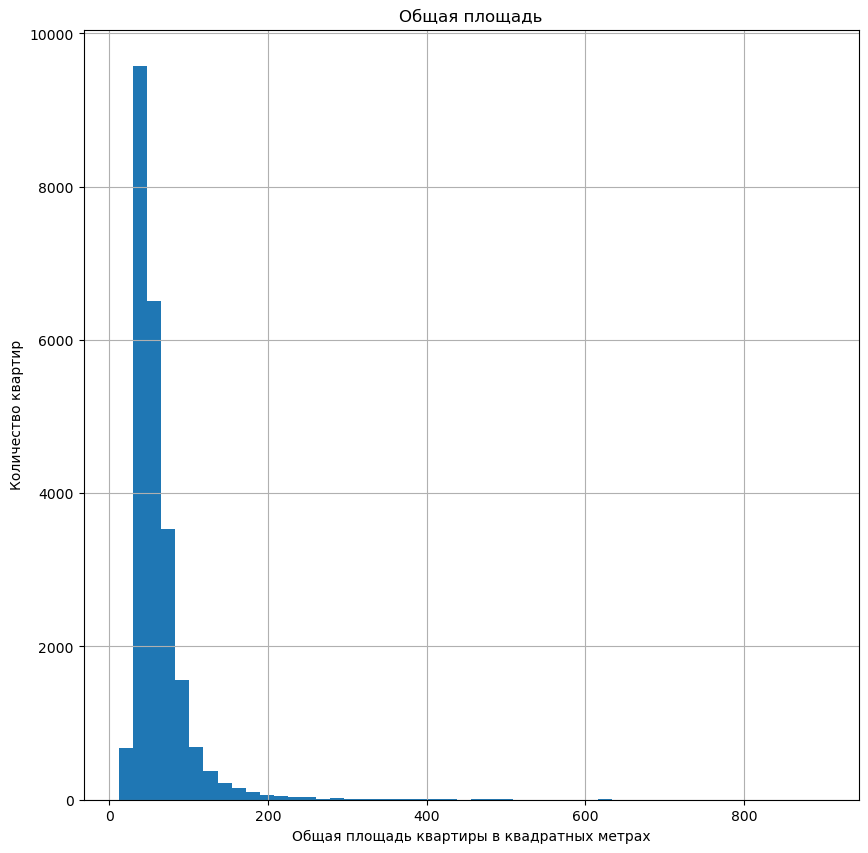

In [36]:
data['total_area'].hist(grid=True, figsize=(10,10), bins=50)
plt.title('Общая площадь')
plt.xlabel('Общая площадь квартиры в квадратных метрах')
plt.ylabel('Количество квартир');

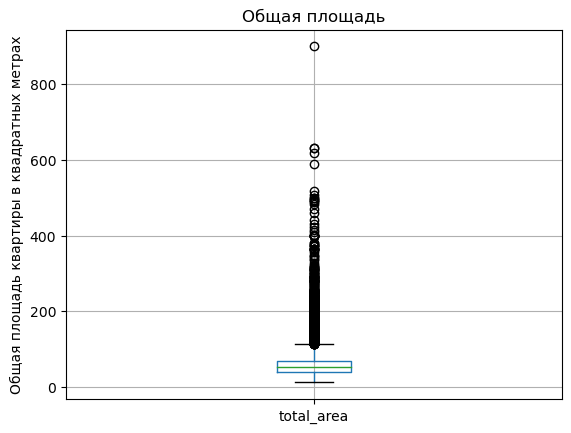

In [37]:
data.boxplot(column='total_area')
plt.title('Общая площадь')
plt.ylabel('Общая площадь квартиры в квадратных метрах');

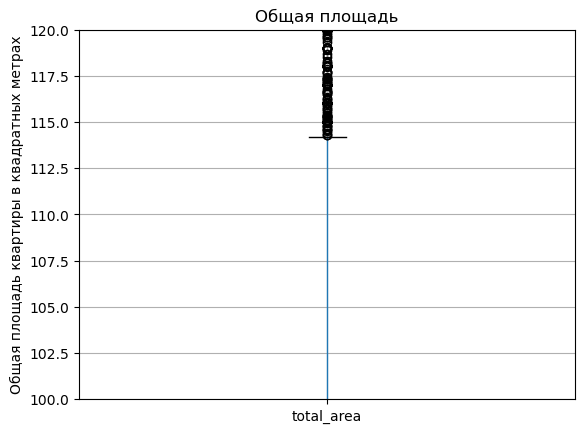

In [38]:
data.boxplot(column='total_area')
plt.ylim(100,120)
plt.title('Общая площадь')
plt.ylabel('Общая площадь квартиры в квадратных метрах');

По диаграмме размаха видно, что все квартиры с прощадью больше 115 квадратных метров считаются выбросами. По гистограмме понятно, что таких значений не так много и их можно удалить.

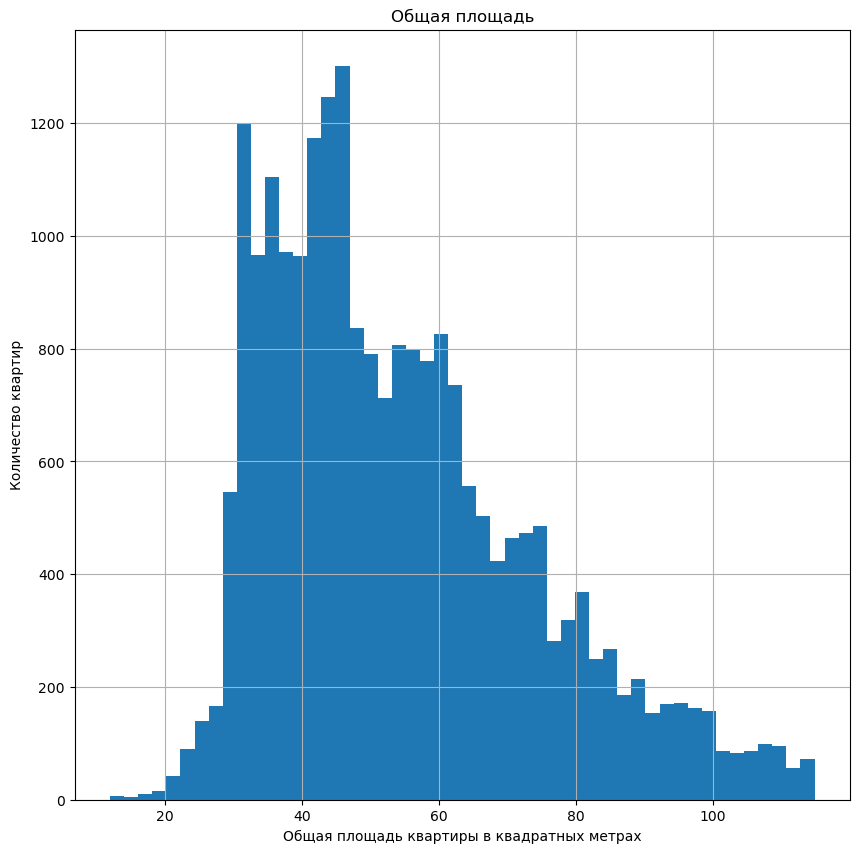

In [39]:
data = data.query('total_area < 115')
data['total_area'].hist(grid=True, figsize=(10,10), bins=50)
plt.title('Общая площадь')
plt.xlabel('Общая площадь квартиры в квадратных метрах')
plt.ylabel('Количество квартир');


Жилая площадь представлена в данных в столбце `living_area`. Сделаем то же, что и ранее: построим гистограмму и диаграмму размаха.

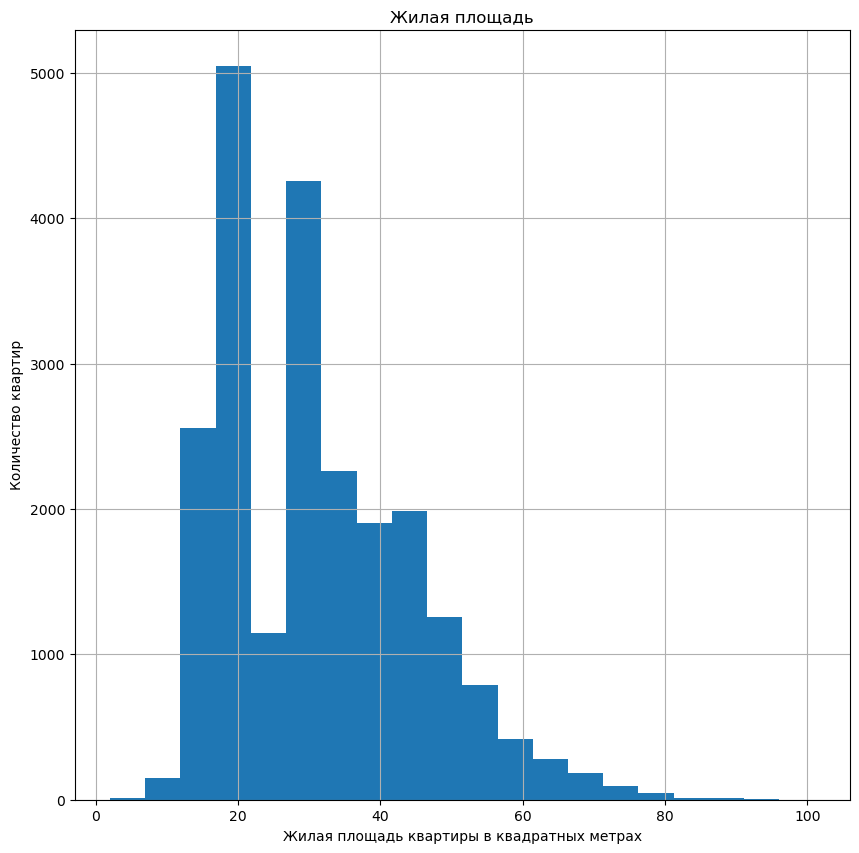

In [40]:
data['living_area'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь квартиры в квадратных метрах')
plt.ylabel('Количество квартир');

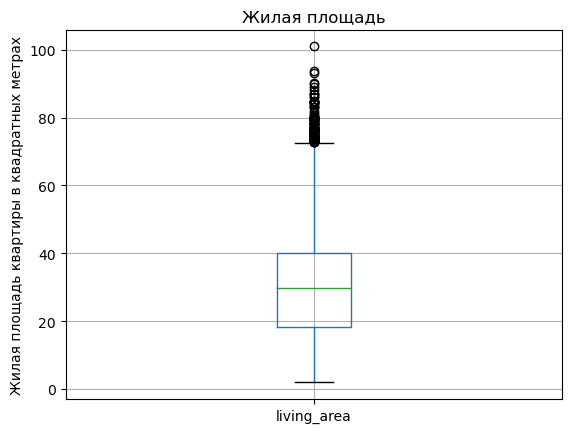

In [41]:
data.boxplot(column='living_area')
plt.title('Жилая площадь')
plt.ylabel('Жилая площадь квартиры в квадратных метрах');

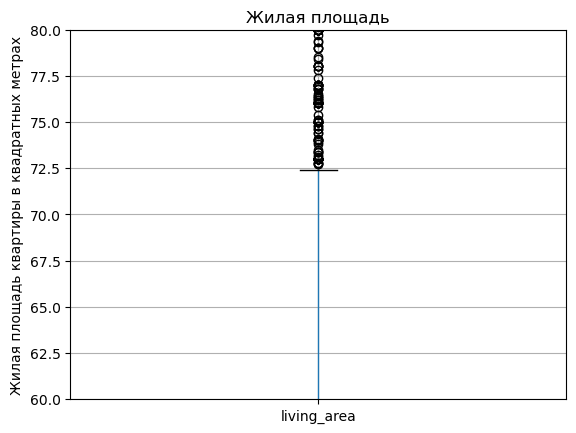

In [42]:
data.boxplot(column='living_area')
plt.ylim(60,80)
plt.title('Жилая площадь')
plt.ylabel('Жилая площадь квартиры в квадратных метрах');

Квартиры с жилой площадью больше 72.5 квадратных метров считаются выбросами. По гистограмме видно, что таких квартир незначительное количество и мы можем их удалить.

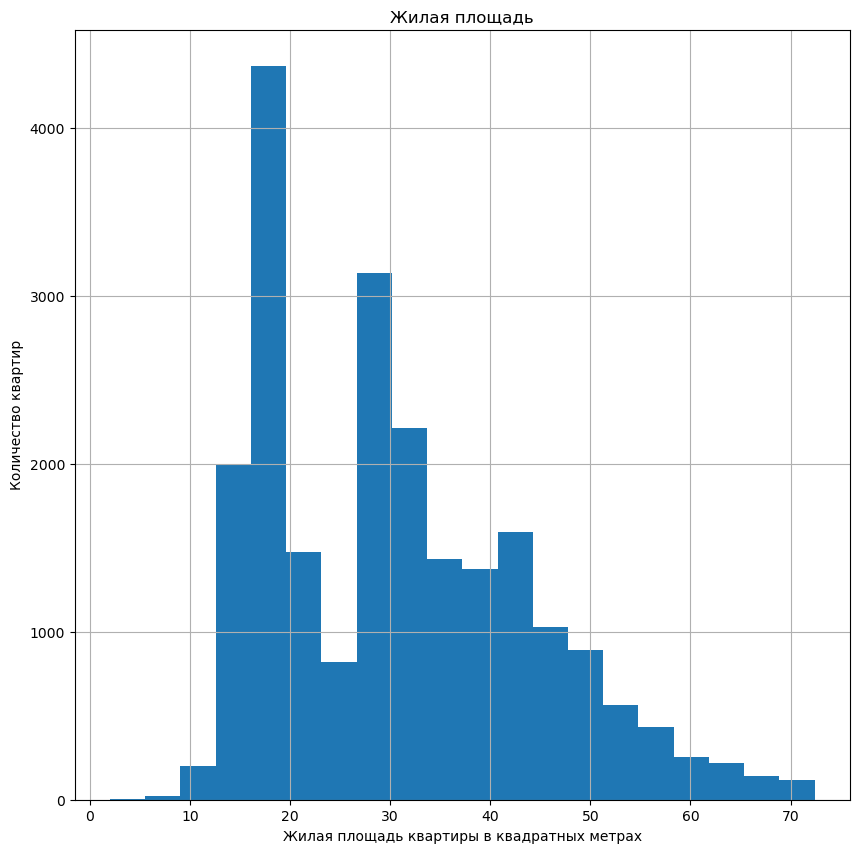

In [43]:
data = data.query('living_area <= 72.5')
data['living_area'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь квартиры в квадратных метрах')
plt.ylabel('Количество квартир');



Площадь кухни представлена в столбце `kitchen_area`. Построим гистограмму и диаграмму размаха.

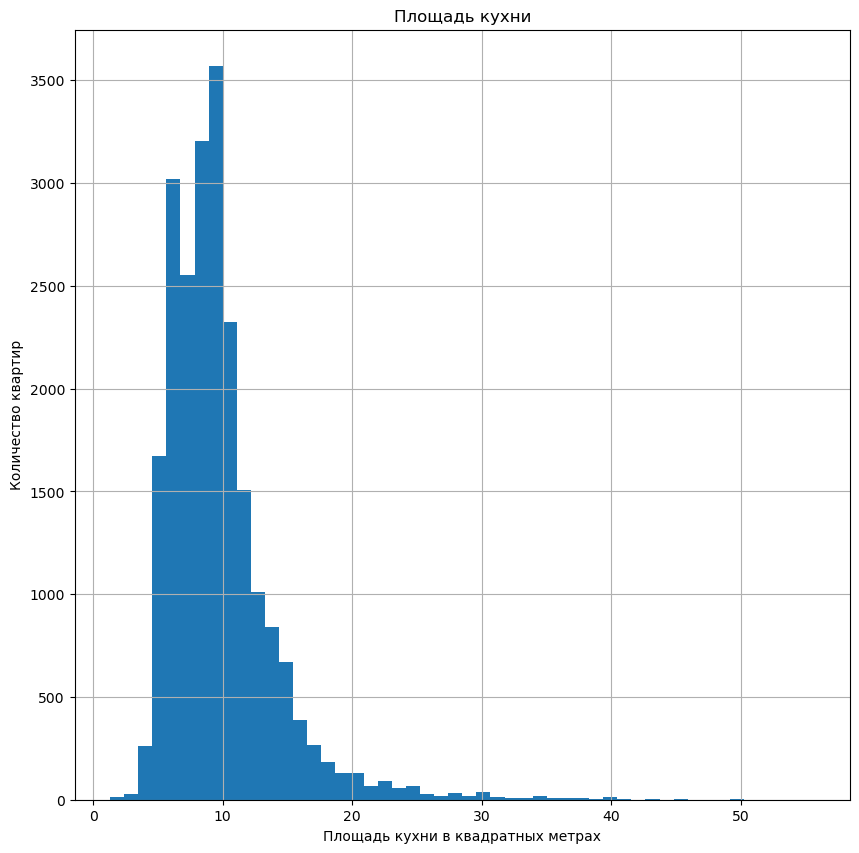

In [44]:
data['kitchen_area'].hist(grid=True, figsize=(10,10), bins=50)
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни в квадратных метрах')
plt.ylabel('Количество квартир');

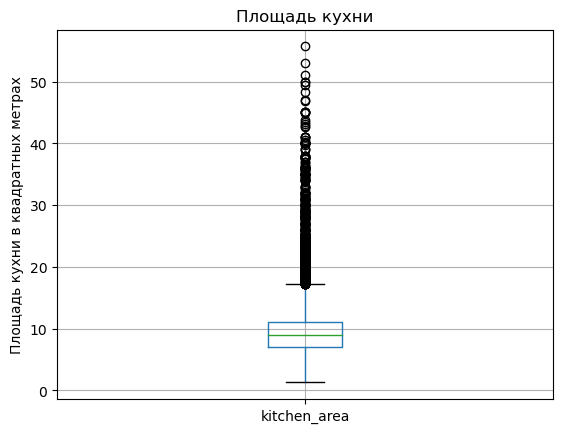

In [45]:
data.boxplot(column='kitchen_area')
plt.title('Площадь кухни')
plt.ylabel('Площадь кухни в квадратных метрах');

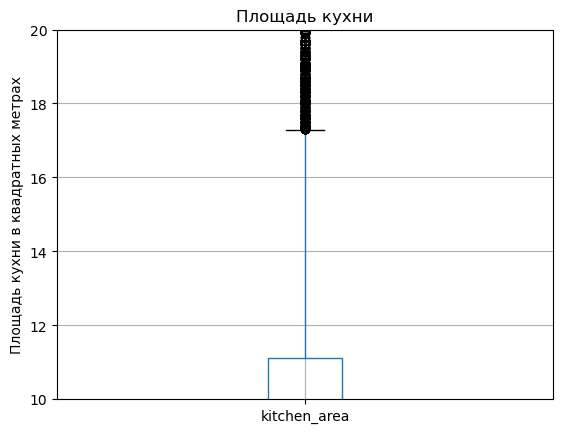

In [46]:
data.boxplot(column='kitchen_area')
plt.ylim(10,20)
plt.title('Площадь кухни')
plt.ylabel('Площадь кухни в квадратных метрах');

Выбросами считаюся данные с площадью кухни больше 17 квадратных метров. Удалим их.

In [47]:
data = data.query('kitchen_area <= 17')

Мы удалили выбросы и теперь можно исследовать данные о площади в другом направлении.

Проверим, есть ли квартиры где общая площадь меньше или равна сумме жилой и кухонной. Такого не может быть, так как в каждой квартире должно быть место еще и под санузел.

In [48]:
data[(data['living_area']+data['kitchen_area'])>=data['total_area']]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,same_locality_name,price_per_square_meter,day_week,month,year,floor_type,city_centers_nearest_km
184,7,2600000.0,30.20,2018-02-14,1,2.65,9,26.10,5,NaN,...,1.0,824.0,12.0,Санкт-Петербург,86092.72,2,2,2018,другой,15.0
220,8,3890000.0,37.00,2018-07-09,1,2.50,25,28.00,6,NaN,...,0.0,NaN,28.0,Санкт-Петербург,105135.14,0,7,2018,другой,16.0
440,8,2480000.0,27.11,2018-03-12,0,2.65,17,24.75,4,NaN,...,2.0,982.0,64.0,Санкт-Петербург,91479.16,0,3,2018,другой,15.0
545,9,4700000.0,23.80,2018-12-28,1,2.65,18,20.00,9,NaN,...,0.0,NaN,108.0,Санкт-Петербург,197478.99,4,12,2018,другой,12.0
551,8,3100000.0,31.59,2018-03-08,1,2.70,19,30.55,2,NaN,...,NaN,NaN,70.0,Мурино,98132.32,3,3,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,0,5800000.0,66.00,2017-06-09,5,2.65,5,55.50,1,NaN,...,0.0,NaN,21.0,Санкт-Петербург,87878.79,4,6,2017,первый,12.0
23191,3,1900000.0,18.90,2016-04-04,1,2.65,16,16.00,12,NaN,...,NaN,NaN,115.0,Тосно,100529.10,0,4,2016,другой,NaN
23202,13,4919880.0,67.92,2018-10-23,2,2.65,3,63.00,3,NaN,...,NaN,NaN,60.0,Всеволожск,72436.40,1,10,2018,последний,NaN
23297,10,1850000.0,48.20,2019-03-13,2,2.65,5,42.20,2,NaN,...,NaN,NaN,45.0,Высоцк,38381.74,2,3,2019,другой,NaN


У 174 квартир не сходятся площади. Удалим их.

In [49]:
data = data[(data['living_area']+data['kitchen_area'])<data['total_area']]



Цена квартиры указана в столбце `last_price`. Построим гистограмму и диаграмму  размаха.

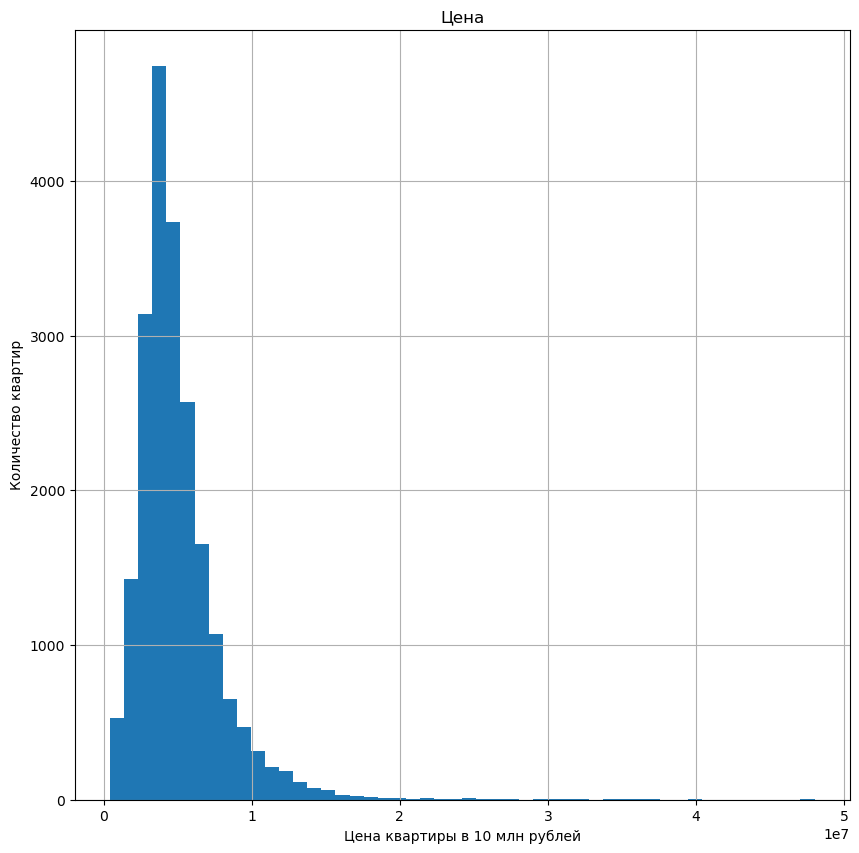

In [50]:
data['last_price'].hist(grid=True, figsize=(10,10), bins=50)
plt.title('Цена')
plt.xlabel('Цена квартиры в 10 млн рублей')
plt.ylabel('Количество квартир');

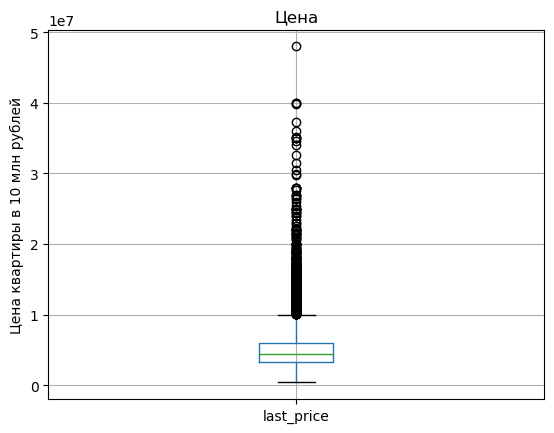

In [51]:
data.boxplot(column='last_price')
plt.title('Цена')
plt.ylabel('Цена квартиры в 10 млн рублей');

Хотя по диаграмме размаха видно, что все квартиры дороже 10 млн относятся к выбросам, не стоит спешить их удалять. Квартир от 10 до 20 млн достаточно много. Их можно оставить, чтобы данные были более достоверными.

Удалим данные с ценой больше 20 млн

In [52]:
data = data.query('last_price <= 20_000_000')

Изучим количество комнат, хранящееся в столбце `rooms`.

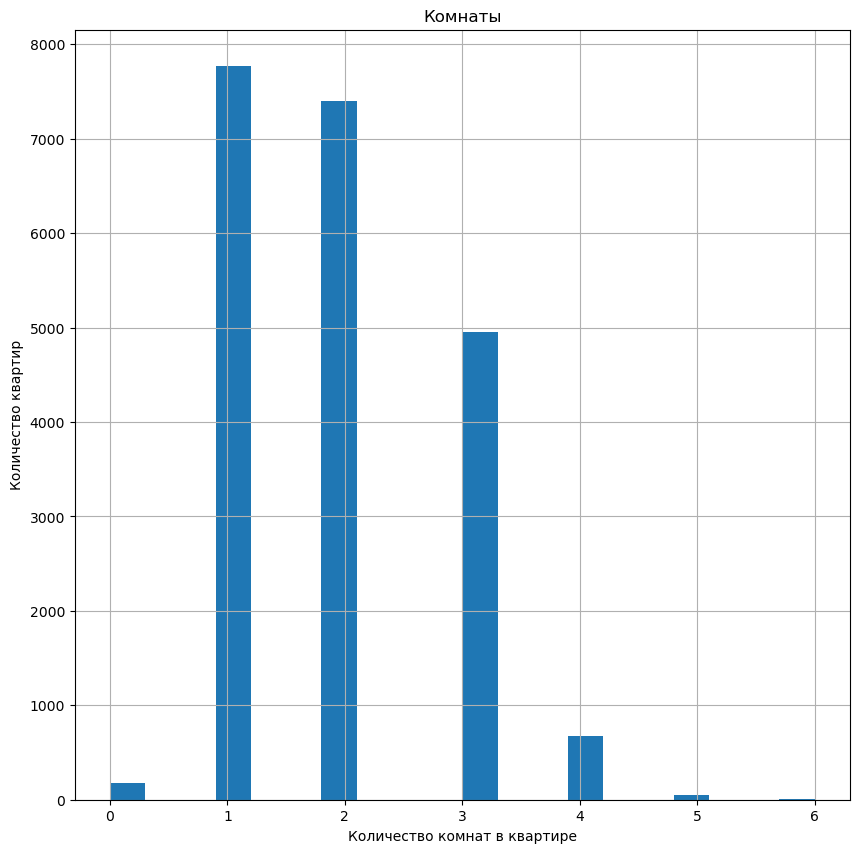

In [53]:
data['rooms'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Комнаты')
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Количество квартир');

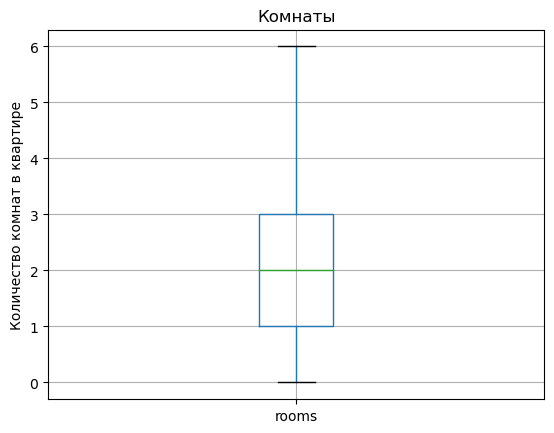

In [54]:
data.boxplot(column='rooms')
plt.title('Комнаты')
plt.ylabel('Количество комнат в квартире');

В данном столбце нет выбросов. 

Чаще всего встречаются однокомнатные и двухкомнатные квартиры. Больше трех комнат в квартире встречается уже намного реже.

Обратимся к столбцу `ceiling_height`, чтобы изучить данные о высоте потолков.

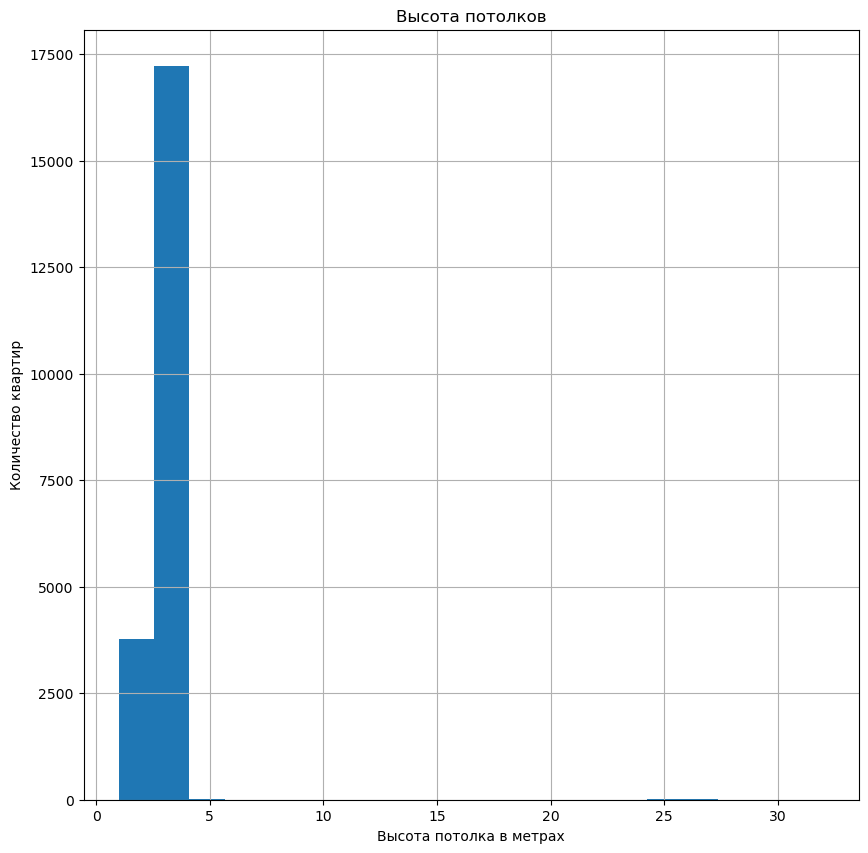

In [55]:
data['ceiling_height'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Высота потолков')
plt.xlabel('Высота потолка в метрах')
plt.ylabel('Количество квартир');

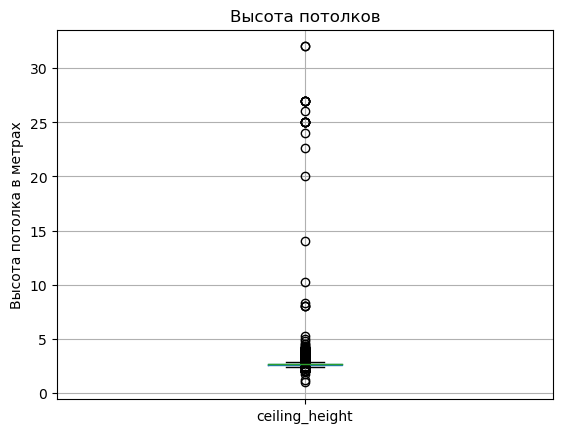

In [56]:
data.boxplot(column='ceiling_height')
plt.title('Высота потолков')
plt.ylabel('Высота потолка в метрах');

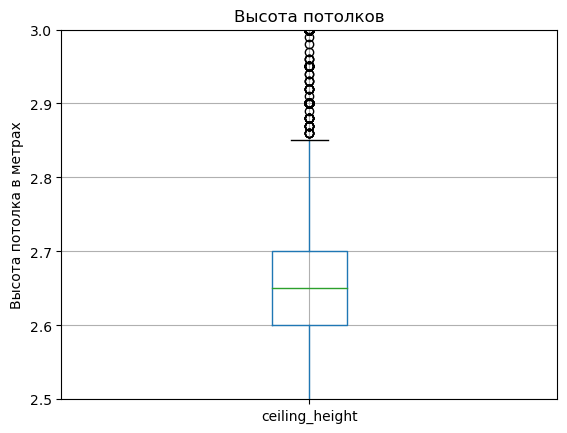

In [57]:
data.boxplot(column='ceiling_height')
plt.ylim(2.5,3)
plt.title('Высота потолков')
plt.ylabel('Высота потолка в метрах');

Минимальной нормой в России считается высота потолка 2.4 метра, поэтому удалим все данные с высотой меньше этой.

Также по диаграмме размаха видно, что есть значения больше 2.85 и они считаются выбросами. Прежде чем их удалять, заметим что есть значения и больше 20 метров. Возможно, это вещественные значения умноженные на 10. Обработаем все значения больше 24

In [58]:
data.loc[data['ceiling_height']>=24,'ceiling_height'] = data.loc[data['ceiling_height']>=24,'ceiling_height'] / 10


In [59]:
data = data.query('(ceiling_height >= 2.4) and (ceiling_height <= 2.85)')

Изучим тип этажа квартиры в столбце `floor_type`.

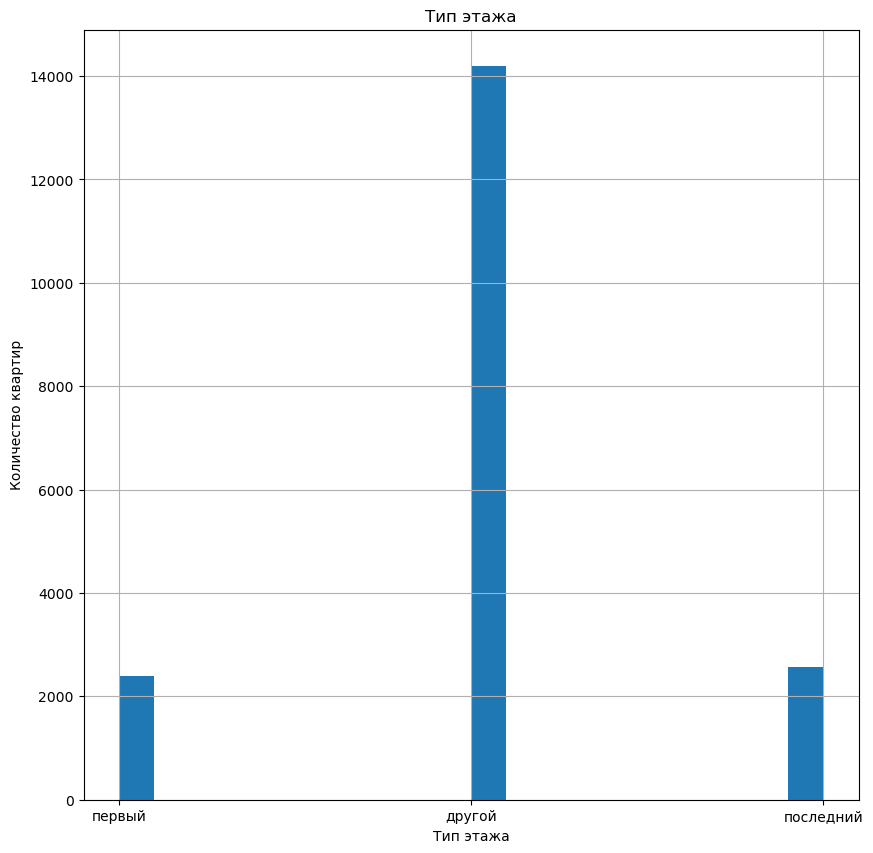

In [60]:
data['floor_type'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Тип этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир');

Хоть гистограмма и состоит из трех столбцов, но по ней видно, что она похожа на нормальное распределение. Первых и последних этажей почти одинаковое количество, так как шанс, что квартира будет на одном из этих этажей почти одинаковый. И все же чаще продаются квартиры на последнем этаже, чем на первом.


Посмотрим на гистограмму общего количества этажей в доме.

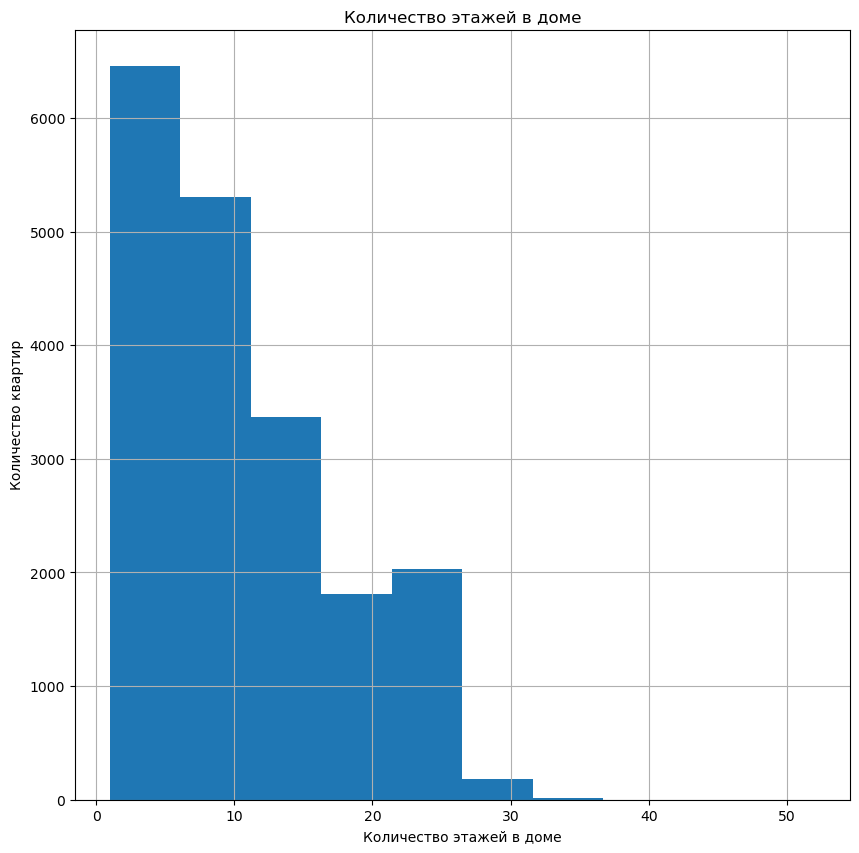

In [61]:
data['floors_total'].hist(grid=True, figsize=(10,10), bins=10)
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир');

Эта гистограмма представляет собой распределение Пуассона. Она показывает частоту постройки здания с определенным количеством этажей. То есть вероятность того, что построят одноэтажное здание намного больше, чем,например, двадцатиэтажное.

Изучим данные в столбце `city_centers_nearest`.

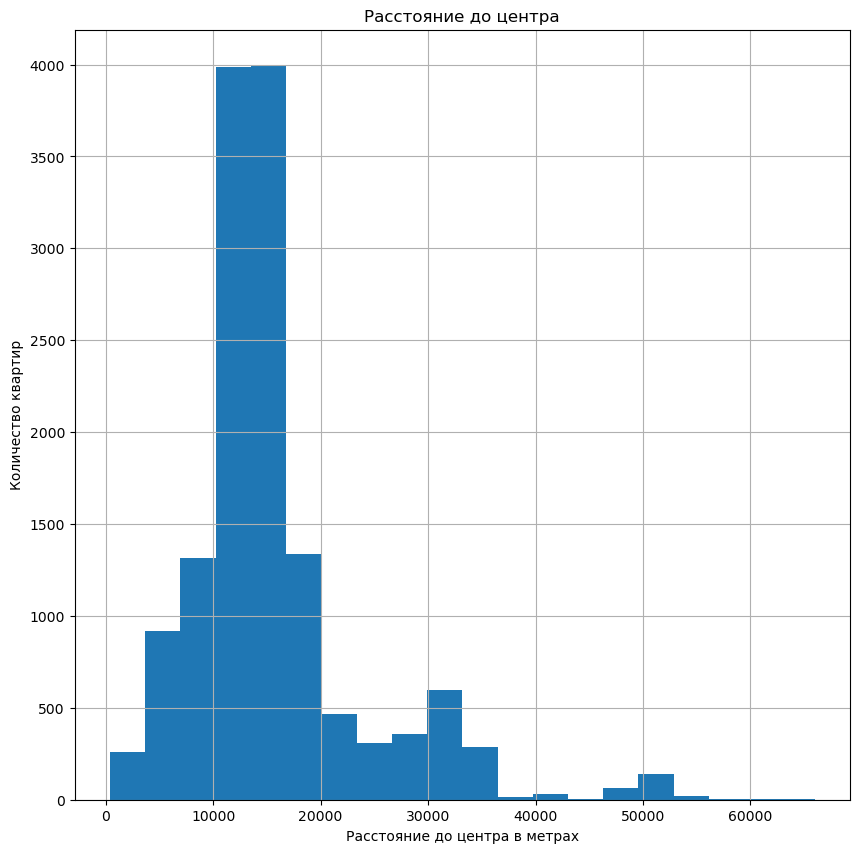

In [62]:
data['city_centers_nearest'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Расстояние до центра')
plt.xlabel('Расстояние до центра в метрах')
plt.ylabel('Количество квартир');

Большинство квартир находятся не дальше 20 км от центра ближайшего города. Однако есть и дальше, вероятно эти квартиры находятся в поселках и деревнях. Мы никак не сможем проверить правильность этих данных, поэтому оставим их такими, какие они есть.

Последними проверим данные о расстоянии до ближайшего парка.

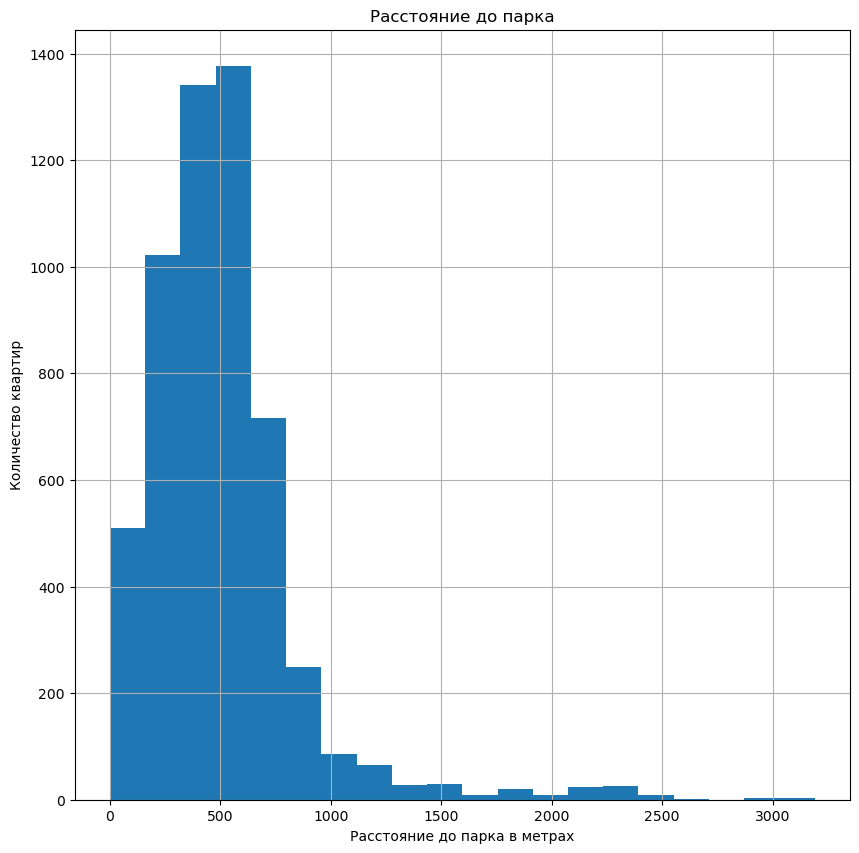

In [63]:
data['parks_nearest'].hist(grid=True, figsize=(10,10), bins=20)
plt.title('Расстояние до парка')
plt.xlabel('Расстояние до парка в метрах')
plt.ylabel('Количество квартир');

Данные о том, что квартира находится на расстоянии 0 метров от парка кажутся странными. Вероятно, эти квартиры просто находятся в непосредственной близости. Можно не изменять эти значения, так как они не исказят результаты нашего будущего исследования.

**Вывод:**

Мы обработали выбросы и противоречащие значения. Описали данные и подметили в них некоторые закономерности. Теперь можно приступать к полноценному анализу данных.

#### Изучение длительности продажи квартир

Воспользуемся данными из столбца `days_exposition` и построим гистограмму, а также найдем среднее и медиану.

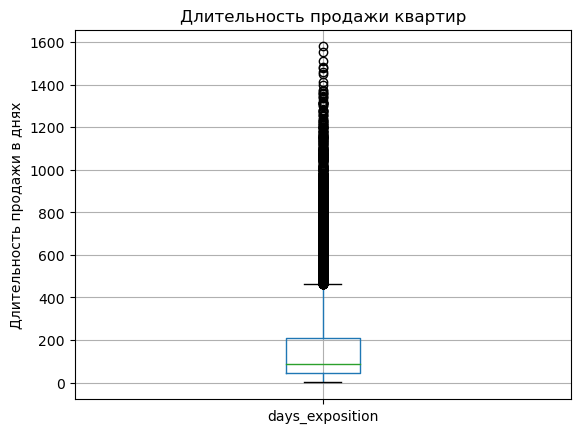

In [64]:
data.boxplot(column='days_exposition')
plt.title('Длительность продажи квартир')
plt.ylabel('Длительность продажи в днях');

In [65]:
print('Средняя длительность продажи квартиры - ',round(data['days_exposition'].mean()),'дней')
print('Медианная длительность продажи квартиры - ',round(data['days_exposition'].median()),'дней')
print('Максимальная длительность продажи квартиры - ',data['days_exposition'].max(),'дней')
print('Минимальная длительность продажи квартиры - ',data['days_exposition'].min(),'дней')

Средняя длительность продажи квартиры -  168 дней
Медианная длительность продажи квартиры -  89 дней
Максимальная длительность продажи квартиры -  1580.0 дней
Минимальная длительность продажи квартиры -  1.0 дней


**Вывод:**

Чаще всего продажа занимает около 3 месяцев. Объявления, которые держатся больше 16 месяцев уже можно считать выбивающимися из общей массы. 25 процентов квартир были куплены меньше, чем за 50 дней. А некоторые объявления висят по несколько лет.

#### Влияние различных факторов на стоимость квартиры

Построим графики и посчитаем корреляцию общей цены от различных параметров.

Корреляция цены от общей площади равна 0.691


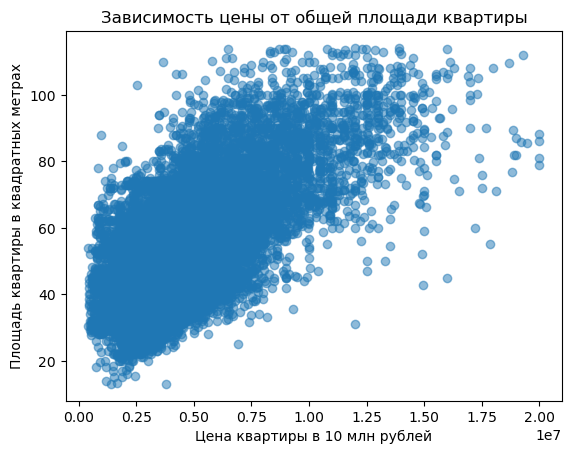

In [66]:
plt.scatter(x=data['last_price'],y=data['total_area'], alpha=0.5)
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Цена квартиры в 10 млн рублей')
plt.ylabel('Площадь квартиры в квадратных метрах');

print('Корреляция цены от общей площади равна', round(data['last_price'].corr(data['total_area']),3))

Корреляция цены от жилой площади равна 0.573


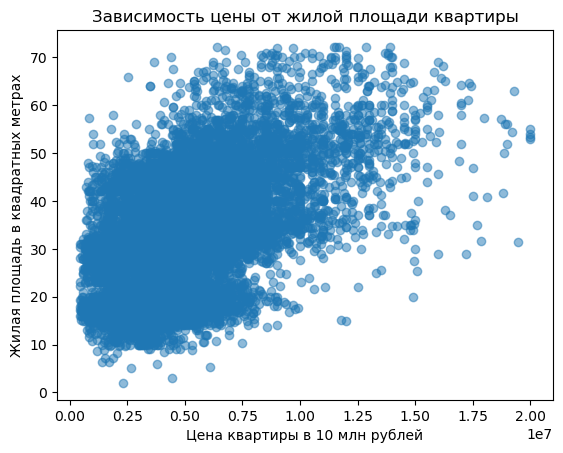

In [67]:
plt.scatter(x=data['last_price'],y=data['living_area'], alpha=0.5)
plt.title('Зависимость цены от жилой площади квартиры')
plt.xlabel('Цена квартиры в 10 млн рублей')
plt.ylabel('Жилая площадь в квадратных метрах');

print('Корреляция цены от жилой площади равна', round(data['last_price'].corr(data['living_area']),3))

Корреляция цены от площади кухни равна 0.523


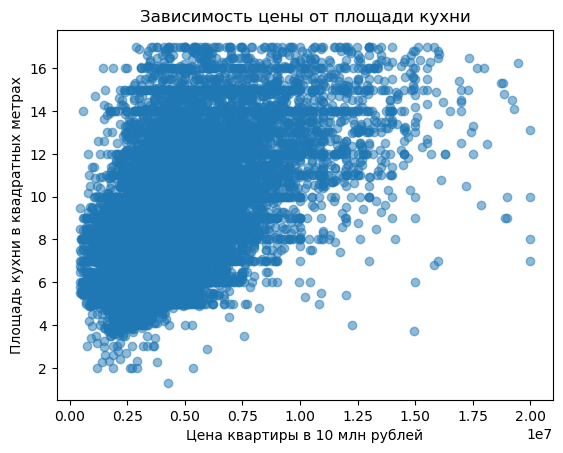

In [68]:
plt.scatter(x=data['last_price'],y=data['kitchen_area'], alpha=0.5)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Цена квартиры в 10 млн рублей')
plt.ylabel('Площадь кухни в квадратных метрах');

print('Корреляция цены от площади кухни равна', round(data['last_price'].corr(data['kitchen_area']),3))

Корреляция цены от количества комнат равна 0.416


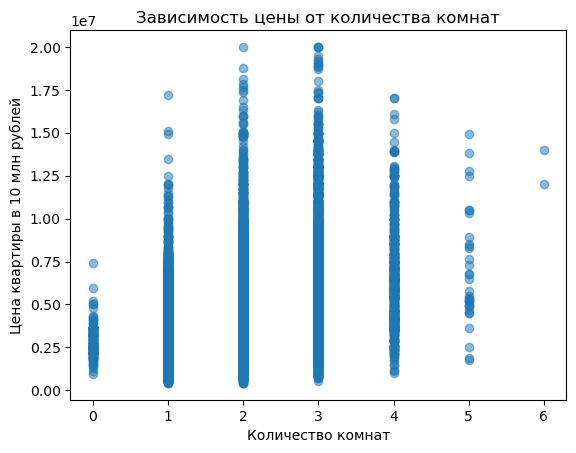

In [69]:
plt.scatter(x=data['rooms'],y=data['last_price'], alpha=0.5)
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена квартиры в 10 млн рублей');

print('Корреляция цены от количества комнат равна', round(data['last_price'].corr(data['rooms']),3))

In [70]:
# создадим столбец, где тип этажа будет представлен числовыми значениями
def floor_type(data):
    if data == 'первый':
        return 1
    elif data == 'последний':
        return 2
    else:
        return 3

data['floor_metric'] = data['floor_type'].apply(floor_type)

Корреляция цены от типа этажа равна 0.167


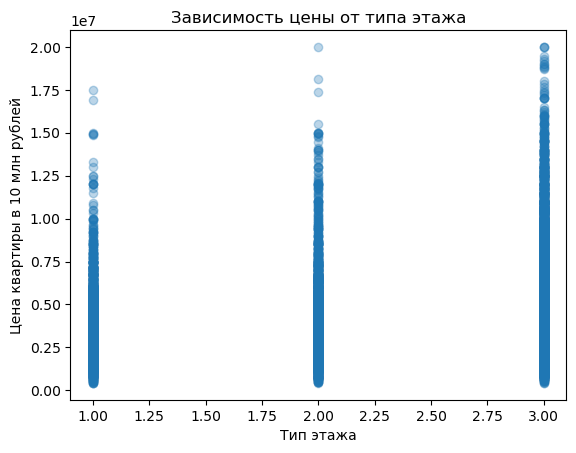

In [71]:
plt.scatter(x=data['floor_metric'],y=data['last_price'], alpha=0.3)
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Цена квартиры в 10 млн рублей');

print('Корреляция цены от типа этажа равна', round(data['last_price'].corr(data['floor_metric']),3))

Корреляция цены от дня недели, в который было выставлено объявление, равна -0.008


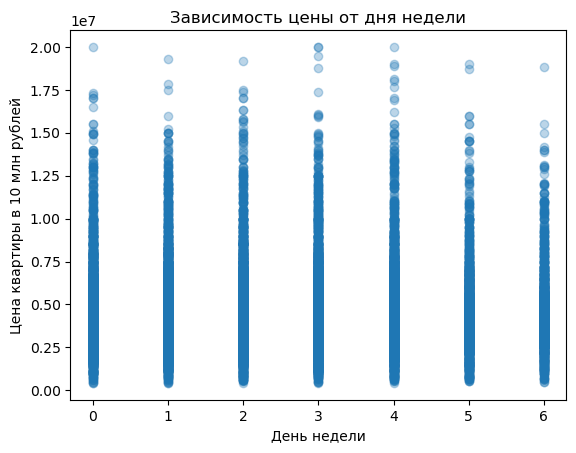

In [72]:
plt.scatter(x=data['day_week'],y=data['last_price'], alpha=0.3)
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры в 10 млн рублей');

print('Корреляция цены от дня недели, в который было выставлено объявление, равна', round(data['last_price'].corr(data['day_week']),3))

Корреляция цены от месяца, в который было выставлено объявление, равна 0.006


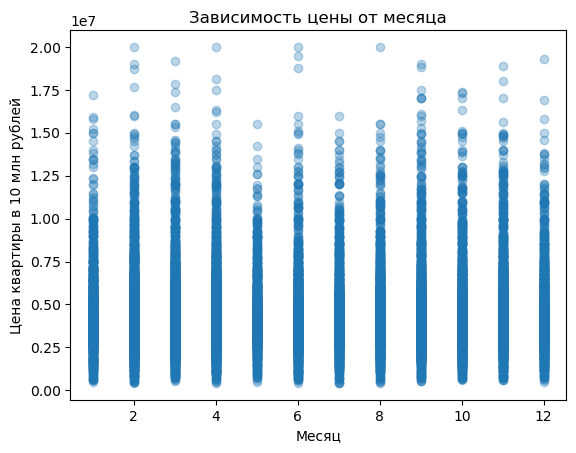

In [73]:
plt.scatter(x=data['month'],y=data['last_price'], alpha=0.3)
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры в 10 млн рублей');

print('Корреляция цены от месяца, в который было выставлено объявление, равна', round(data['last_price'].corr(data['month']),3))

Корреляция цены от года, в который было выставлено объявление, равна 0.012


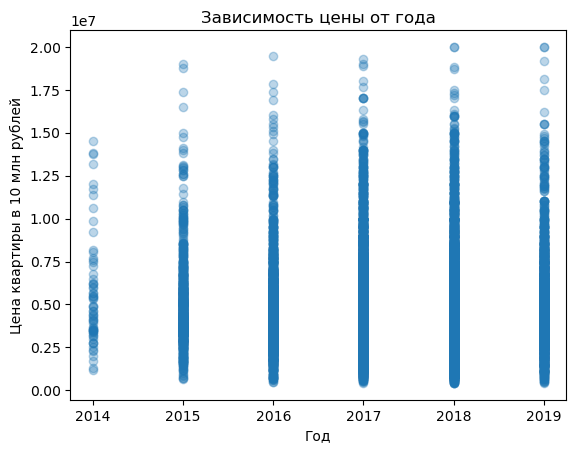

In [74]:
plt.scatter(x=data['year'],y=data['last_price'], alpha=0.3)
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена квартиры в 10 млн рублей');

print('Корреляция цены от года, в который было выставлено объявление, равна', round(data['last_price'].corr(data['year']),3))

**Вывод:**

1. Цена сильно зависит от общей площади квартиры. Это хорошо видно на диаграмме рассеяния и по коэффициенту корреляции (его значение 0.7). Чем больше площадь, тем выше цена.
2. Общая стоимость зависит от жилой площади. Это объясняется тем, что жилая площадь зависит от общей. В данном случае коэффициент корреляции немного ниже, но он всё ещё ближе к 1 чем к 0.
3. Площадь кухни также зависит от общей площади. Поэтому и цена больше, чем больше кухня. Но это правило будет работать не всегда, так как коэффициент корреляции не очень большой ( 0.52).
4. Цена почти не зависит от количества комнат. Но можно отметить, что самые дорогие квартиры имеют 2 или 3 комнаты, а у самых дешевых комнат не больше 3. 
5. Коэффициент корреляции цены от типа этажа близок к нулю, значит, два этих параметра не зависят друг от друга. По графику можно заметитьт только то, что квартиры дороже 17,5 млн находятся не на первом этаже.
6. Цена не зависит от дня недели, в который было выставлено объявление.
7. Цена не зависит от месяца, в который было выставлено объявление. Но есть закономерность, что квартиры дороже 15 млн выставляют с мая по август реже, чем в остальные месяцы.
8. Цена не зависит от года, в который было выставлено объявление. Можно заметить одну особенность, что в 2014 году не выставлялись квартиры от 15 до 20 млн.


#### Средняя цена одного квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах, где было выставлено больше всего объявлений.

In [75]:
data_pivot_price = data.pivot_table(index='same_locality_name', values='price_per_square_meter', aggfunc=['count','median'])
data_pivot_price.columns = ['count','median']
data_pivot_price = data_pivot_price.sort_values(by='count', ascending=False)[0:10]
data_pivot_price = data_pivot_price.sort_values(by='median', ascending=False)
data_pivot_price

,count,median
same_locality_name,,
Санкт-Петербург,11916,101851.850
Пушкин,295,98214.290
Кудрово,429,96119.930
посёлок Парголово,312,92271.975
Мурино,552,86194.135
посёлок Шушары,425,76666.670
Колпино,312,74866.550
Гатчина,281,67173.910
Всеволожск,361,65540.540


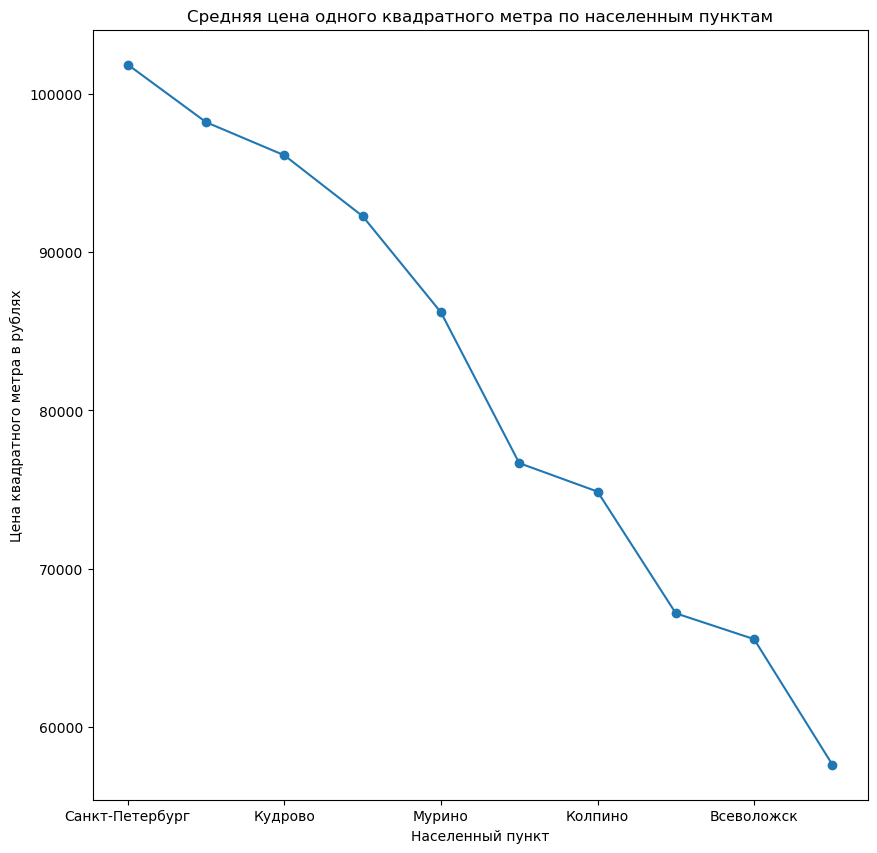

In [76]:
data_pivot_price['median'].plot( style='o-', figsize=(10,10))
plt.title('Средняя цена одного квадратного метра по населенным пунктам')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена квадратного метра в рублях');

**Вывод:**

Средняя цена за квадратный метр в Санкт-Петербурге 102 000. Это почти в два раза больше чем в Выборге, в котором цена за квадратный метр составляет 58 000. 

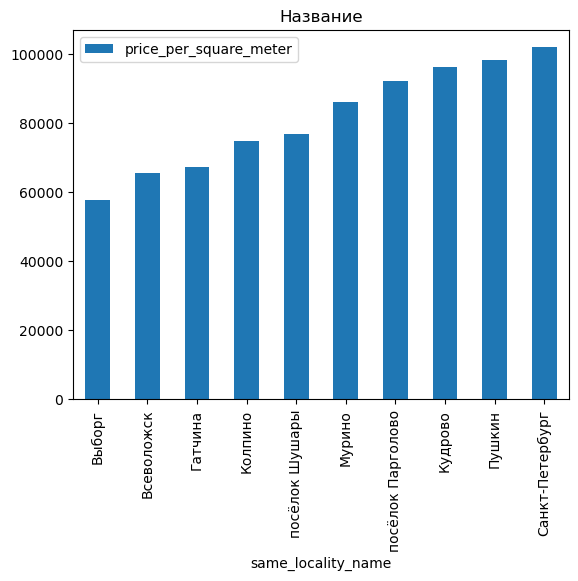

In [77]:
#Код ревьюера
top_locality = data['same_locality_name'].value_counts().sort_values(ascending=False).head(10)
(data
    .query('same_locality_name in @top_locality.index')
    .pivot_table(index='same_locality_name', values='price_per_square_meter', aggfunc='median')
    .sort_values('price_per_square_meter')
    .plot(kind='bar'),
     plt.title('Название')
     
);

#### Средняя цена километра до центра города

Построим график и посмотрим, как цена квартиры зависит от расстояния до центра города. Для этого выберем объекты в Санкт-Петербурге и найдем для них среднюю цену километров.

In [78]:
data['price_km'] = data['last_price'] / data['city_centers_nearest_km'] 

data_sp = (data.query('same_locality_name == "Санкт-Петербург"').
            groupby('city_centers_nearest_km')['price_km'].mean())

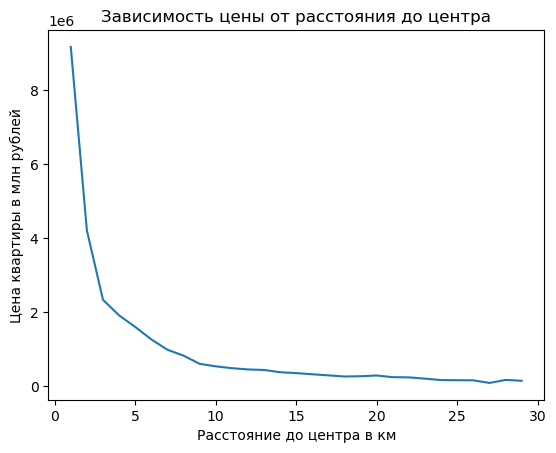

In [79]:
plt.plot(data_sp.index , data_sp)
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние до центра в км')
plt.ylabel('Цена квартиры в млн рублей');

**Вывод:**

График напоминает гиперболу, и по нему можно сделать вывод, что чем дальше от центра квартиры, тем они дешевле. Причем квартиры, расположенные в непосредственной близости от центра, стоят в несколько раз дороже квартир, находящихся за 10 км от центра. Цена квартир дальше 10 км почти не изменяется.

### Общий вывод

Мы провели исследовательский анализ данных о продажах квартир.

На этапе предобработки мы выполнили следующие действия:
1. Удалили или заменили пропуски там, где это было возможно
2. Поменяли тип данных там, где это было необходимо
3. Удалили неявные дубликаты в столбце `locality_name`

Далее мы добавили новые параметры в данные для упрощения работы с информацией.

Затем изучили выбросы и обработали их. После изучения можно отметить следующее:

* Обычно общая пложадь квартиры меньше 115 квадратных метров.
* В большинстве случаев жилая площадь квартиры не больше 72 квадратных метров. Чаще всего в квартирах жилая площадь составляет 20 или 30 квадратных метров.
* Площадь кухни обычно не превышает 17 квадратных метров.
* Большинство квартир продают за сумму не больше 20 млн рублей.
* В основном квартиры имеют одну, две или три комнаты. Квартиры с большим количеством комнат встречаются намного реже.
* В среднем высота потолка в квартире от 2.4 до 2.85 метров.
* Люди чаще покупают квартиры на последнем этаже, чем на первом.
* Чаще продают квартиры в зданиях с небольшим количеством этажей. Двадцатиэтажные здания и выше встречаются реже.
* Большинство квартир находятся не дальше 20 км от центра ближайшего города.
* Большинство квартир находятся не дальше 1 километра от ближайшего парка.

После мы провели несколько исследований. Выводы, сделанные по ним:
1. В основном квартиры продаются за 3 месяца. 25 процентов квартир продаются раньше 50 дней, 75 прцентов - раньше 16 месяцев. Некоторые объявления висят по несколько лет.
2. Цена на квартиру в основном зависит от ее площади. Коэффициент корреляции цены от площадь квартиры составляет 0.7. Цена также зависит от количества комнат, хоть и коэффициент корреляции не очень большой (0.4). У самых дешевых квартир комнат не больше 3. От остальных параметров цена почти не зависит.
3. Средняя цена за квадратный метр в Санкт-Петербурге 102 000. 
4. Цена квартиры имеет гиперболическую зависимость от расстояния до центра. Квартиры, расположенные в непосредственной близости от центра, стоят в несколько раз дороже квартир, находящихся за 10 км от центра. Цена квартир дальше 10 км почти не изменяется.